# Stanisław Gajda 406643
# projekt 3

In [1]:
import pandas as pd
import numpy as np

In [19]:
np.random.normal(0,1, 5)

array([ 1.81182928,  1.38926269,  0.01361333,  0.34507468, -0.98477173])

In [23]:
# generuje skorelowane przyrosty procesow wienera
def generate_correlated_normals(rho, std, antithetic = False, N = 5):
    Z1 = np.random.normal(0, std, N)
    Z2 = np.random.normal(0, std, N)
    X = Z1
    Y = rho * Z1 + np.sqrt(1 - rho**2) * Z2
    if(antithetic == False):
        return (X, Y)
    else:
        return (X, Y), (-X, -Y)

In [25]:
generate_correlated_normals(0, 1, antithetic = True)

((array([ 0.56817615, -1.50594995,  2.19734508, -0.82097408,  1.04961695]),
  array([-0.55022027,  0.13684546,  0.79854298,  0.79261974,  1.02532119])),
 (array([-0.56817615,  1.50594995, -2.19734508,  0.82097408, -1.04961695]),
  array([ 0.55022027, -0.13684546, -0.79854298, -0.79261974, -1.02532119])))

In [48]:
import numpy as np
def HWcall_MC(S0=50, V0=0.06, r=0.05, sigma=0.4, a=2, b=0.04, alpha=0.5,
              rho=-0.7, T=2.0, K=45, n=500, M=10000, use_antithetic=True):
    dt = T / n
    # zeby na pewno M bylo parzyste
    M = M - M%2
    payoffs = np.zeros(M)
    # jezeli uzywamy zmiennych antytetycznych jest M/2 iteracji
    if(use_antithetic):
        num_loops = int(M/2)
 
    for i in range(num_loops):
        if use_antithetic:
            # Generuje n przyrostow
            (dW_S, dW_V), (dW_Sa, dW_Va) = generate_correlated_normals(rho, std=np.sqrt(dt), antithetic=True, N=n)
        else:
            dW_S, dW_V = generate_correlated_normals(rho, std=np.sqrt(dt), antithetic=False, N=n)

        # Initial conditions
        S, V = S0, V0
        if use_antithetic:
            Sa, Va = S0, V0
        S_tab = []
        V_tab = []
        # Simulate path(s)
        for j in range(n):
            dS = S * (r * dt + np.sqrt(V) * dW_S[j])
            dV = a * (b - V) * dt + sigma * V**alpha * dW_V[j]
            V += dV
            S += dS
            V = max(V, 0)
            S = max(S, 0)
            S_tab.append(S)
            V_tab.append(V)

            if use_antithetic:
                dSa = Sa * (r * dt + np.sqrt(Va) * dW_Sa[j])
                Sa += dSa
                dVa = a * (b - Va) * dt + sigma * Va**alpha * dW_Va[j]
                Va += dVa
                Sa = max(Sa, 0)
                Va = max(Va, 0)
        payoffs[2 * i] = max(S - K, 0)
        if use_antithetic:
            payoffs[2 * i + 1] = max(Sa - K, 0)

    return np.exp(-r * T) * np.mean(payoffs[:M]), S_tab, V_tab


In [49]:
price, S, V = HWcall_MC()

In [54]:
# ex 5
price, S, V = HWcall_MC(S0=100,V0 = 0.09, r = 0.05, sigma = 1, a = 2, b = 0.09, alpha=0.5, rho = -0.3, T = 5, K=100, n = 3 * 10 ** 4)

In [ ]:
price

np.float64(35.235608502261165)

: 

In [46]:
import pandas as pd
df = pd.DataFrame({"VOL_path":V, "Price_path": S})

<Axes: >

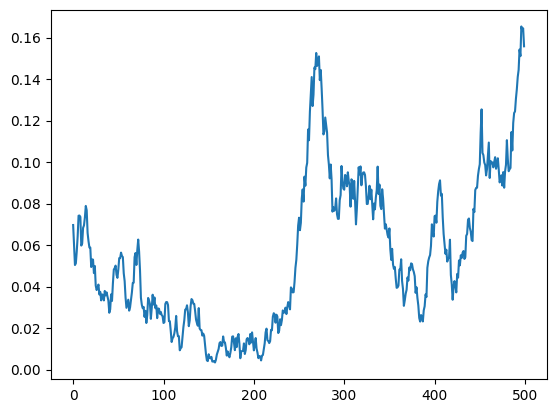

In [47]:
df["VOL_path"].plot()